# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('stock_data.csv')
stock = df.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
stock.isnull().sum()
#no null values. at least, no np.nan values.

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [4]:
stock.duplicated().sum()
#no duplicate rows.

0

In [5]:
stock.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [6]:
stock.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding   577028337.754029   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

### There are 4 columns with categories, and two of these are categories spanning the entire row count.

### At least 1 company has a cash ratio of 0.0. This is very odd, as it implies the company has no money, or so many liabilities that it dwarfs their money.

### For the most part, I will be ignoring the ticker+security in EDA.

---
---
---

# <ins>Exploratory Data Analysis (EDA)</ins>

**Questions**:

✔ 1. What does the distribution of stock prices look like? (Uni Current Price)  
✔ 2. The stocks of which economic sector have seen the maximum price increase on average? (GICS Sector vs Price Change)  
✔ 3. How are the different variables correlated with each other? (Heatmap)  
✔ 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors? (GICS Sector vs Cash Ratio)  
✔ 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors? (GICS Sector vs P/E Ratio)

---
# <ins>Univariate Analysis</ins>

In [7]:
def histobox(data,x,bins=200):
    plot = make_subplots(rows=2,
                         cols=1,
                         row_heights=[0.2, 0.8],
                         shared_xaxes=True,
                         #column_titles=['<b>'+x+'</b>']
                        )
    plot.add_trace(
        go.Box(x=data[x],
               line={'color': '#1F2022'},
               fillcolor='orange',name='Boxplot'),
        row=1,col=1
    )

    plot.add_trace(
        go.Histogram(x=data[x],
                    marker = {'color': '#088F8F'},
                    nbinsx=bins,name='Histogram'
                    ),
        row=2,col=1
    )

    plot.update(layout_showlegend=False)
    plot.update_layout(width=800,height=400,margin=dict(l=0, r=0, t=40, b=40),title='<b>'+x+'</b>',title_x=0.514)
    plot.add_vline(x=data[x].mean(), line_width=1, line_dash="dash", line_color="#355E3B")
    plot.show()

In [8]:
for column in list(stock.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'],axis=1).columns):
    histobox(stock,column,bins=75)

### Current Prices have many outliers, and 1.5x IQR seems to lie a little below 200 dollars, US.

### P/E Ratio is always positive. However, we have some negative Earnings Per Share values, which seems to contradict this.

In [9]:
stock[stock['Earnings Per Share']<0].head(5)

Ticker Symbol                 Security  GICS Sector  \
30           APA       Apache Corporation       Energy   
31           APC  Anadarko Petroleum Corp       Energy   
33          ARNC              Arconic Inc  Industrials   
44           BHI         Baker Hughes Inc       Energy   
49           BSX        Boston Scientific  Health Care   

                     GICS Sub Industry  Current Price  Price Change  \
30  Oil & Gas Exploration & Production      44.470001     11.397804   
31  Oil & Gas Exploration & Production      48.580002    -20.802083   
33                 Aerospace & Defense       7.398807      1.647784   
44      Oil & Gas Equipment & Services      46.150002    -12.312367   
49               Health Care Equipment      18.440001     11.757582   

    Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
30    2.405408  917          80      698000000 -23528000000   
31    2.435165   52          22    -6430000000  -6692000000   
33    2.592065    3          37       42000000   -322000000   
44    2.559553   12          84      584000000  -1967000000   
49    1.491764    4          13     -268000000   -239000000   

    Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
30              -61.20                  3.844444e+08  93.089287   4.970809  
31              -13.18                  5.077390e+08  93.089287 -12.860938  
33               -0.31                  1.038710e+09  18.687607   2.639814  
44               -4.49                  4.380846e+08  93.089287  13.490544  
49               -0.18                  1.327778e+09  31.468962  -3.880921

In [10]:
(round(stock['P/E Ratio'],4) != round(stock['Current Price']/stock['Earnings Per Share'],4)).sum()

53

### As it turns out, there are some P/E ratios, 53 in fact, which do not actually reflect the ratio between Price and Earnings/share.

### We will recalculate all of the P/E's, to ensure accuracy in our data.

In [11]:
stock['P/E Ratio'] = (stock['Current Price']/stock['Earnings Per Share'])
stock[stock['P/E Ratio']<0].head(5)

Ticker Symbol                 Security  GICS Sector  \
30           APA       Apache Corporation       Energy   
31           APC  Anadarko Petroleum Corp       Energy   
33          ARNC              Arconic Inc  Industrials   
44           BHI         Baker Hughes Inc       Energy   
49           BSX        Boston Scientific  Health Care   

                     GICS Sub Industry  Current Price  Price Change  \
30  Oil & Gas Exploration & Production      44.470001     11.397804   
31  Oil & Gas Exploration & Production      48.580002    -20.802083   
33                 Aerospace & Defense       7.398807      1.647784   
44      Oil & Gas Equipment & Services      46.150002    -12.312367   
49               Health Care Equipment      18.440001     11.757582   

    Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
30    2.405408  917          80      698000000 -23528000000   
31    2.435165   52          22    -6430000000  -6692000000   
33    2.592065    3          37       42000000   -322000000   
44    2.559553   12          84      584000000  -1967000000   
49    1.491764    4          13     -268000000   -239000000   

    Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
30              -61.20                  3.844444e+08   -0.726634   4.970809  
31              -13.18                  5.077390e+08   -3.685888 -12.860938  
33               -0.31                  1.038710e+09  -23.867118   2.639814  
44               -4.49                  4.380846e+08  -10.278397  13.490544  
49               -0.18                  1.327778e+09 -102.444450  -3.880921

### Something important to note: P/E Ratios that are negative are usually ignored by financiers, but for our use in clustering, I will be keeping them in.

### Next, I want to investigate the cash ratio.

In [12]:
stock[stock['Cash Ratio']==0]
#total reserves / total liabilities

Ticker Symbol                Security             GICS Sector  \
64           CHTR  Charter Communications  Consumer Discretionary   
76            COG         Cabot Oil & Gas                  Energy   
190           LNT     Alliant Energy Corp               Utilities   
267           RRC   Range Resources Corp.                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
64                    Cable & Satellite     183.100006      3.598507   
76   Oil & Gas Exploration & Production      17.690001    -20.099360   
190                  Electric Utilities      31.225001      6.642759   
267  Oil & Gas Exploration & Production      24.610001    -25.106512   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
64     1.697942  589           0        2000000  -271000000   
76     3.055818    6           0      -20440000  -113891000   
190    1.115842   10           0      -51100000   388400000   
267    3.712995   26           0          23000  -713685000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
64                -2.43                   111522633.7 -75.349797 -76.119077  
76                -0.28                   406753571.4 -63.178575  -0.223147  
190                3.36                   115595238.1   9.293155  -4.606591  
267               -4.29                   166360139.9  -5.736597   0.525090

### Every one of these 4 companies is either in the red by income or by cash flow. This tells me that their reserves are depleting, which makes a ratio of ~0 (rounded) much more believable.
### I will not treat a cash ratio of 0 as a missing value.
---
### Moving on with Univariate Analysis...

In [13]:
def countplot_plotly(data,x,palette='coolwarm',mult=2):
    if len(list(data[x].unique())) > 20:
        plot = px.bar(pd.DataFrame(data[x].value_counts()).reset_index().rename(columns={'index':x,x:'Count'}),
              x=x,
              y='Count',
              color_discrete_sequence=[sns.color_palette(palette,(mult*len(list(data[x].unique())))).as_hex()])
        plot.update_xaxes(showticklabels=False)
        plot.update_layout(width=900,height=500,
                           margin=dict(l=0, r=100, t=40, b=0),
                           yaxis_title=None,xaxis_title=None,
                           title='<b>'+x+'</b>',title_x=0.426)
        plot.show()
    
    else:
        plot = px.bar(pd.DataFrame(data[x].value_counts()).reset_index().rename(columns={'index':x,x:'Count'}),
              x=x,
              y='Count',
              color_discrete_sequence=[sns.color_palette(palette,(mult*len(list(data[x].unique())))).as_hex()])
        plot.update_layout(width=900,height=500,
                           margin=dict(l=0, r=100, t=40, b=0),
                           yaxis_title=None,xaxis_title=None,
                           title='<b>'+x+'</b>',title_x=0.426)
        plot.show()

In [14]:
cats = ['GICS Sector','GICS Sub Industry']
for cat in cats:
    countplot_plotly(stock,cat)

### The 4 biggest Sectors are Industrials, Financials, Health Care, and Consumer Discretionary.
### The biggest Sub Industries are Oil & Gas, REITs, and Industrial Conglomerates.
---
# <ins>Bivariate Analysis</ins>

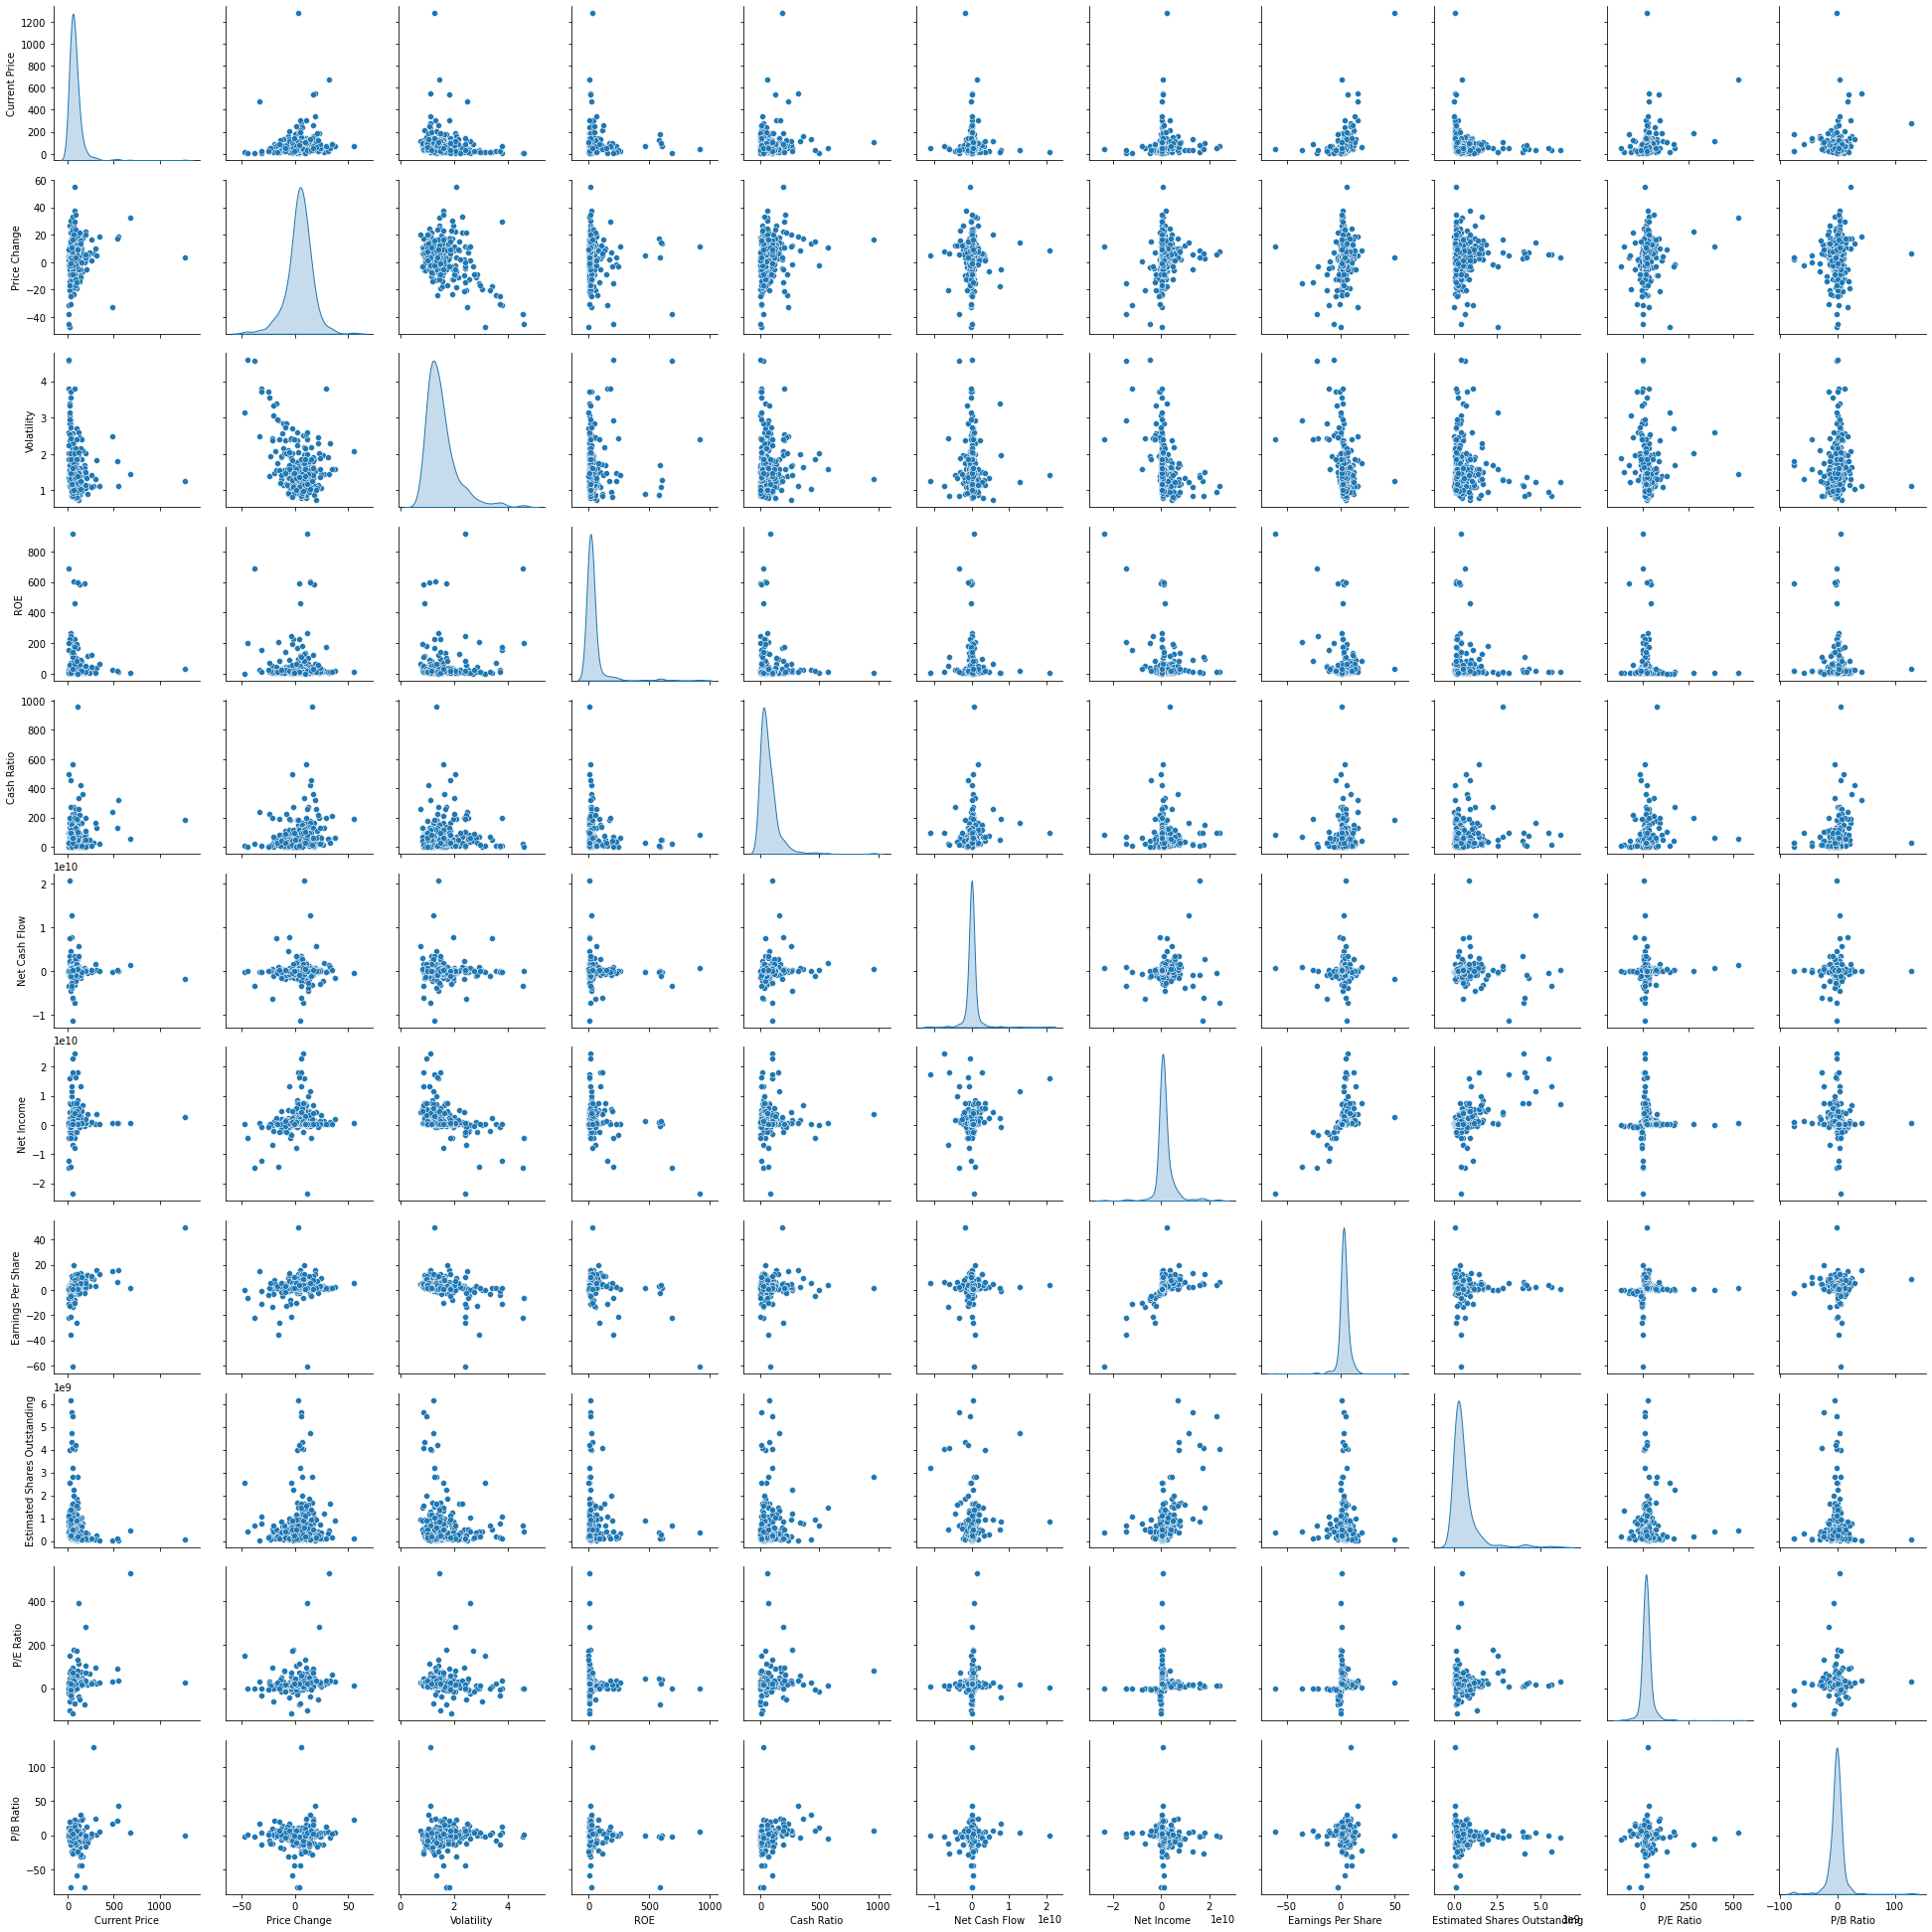

In [15]:
sns.pairplot(stock,diag_kind='kde');

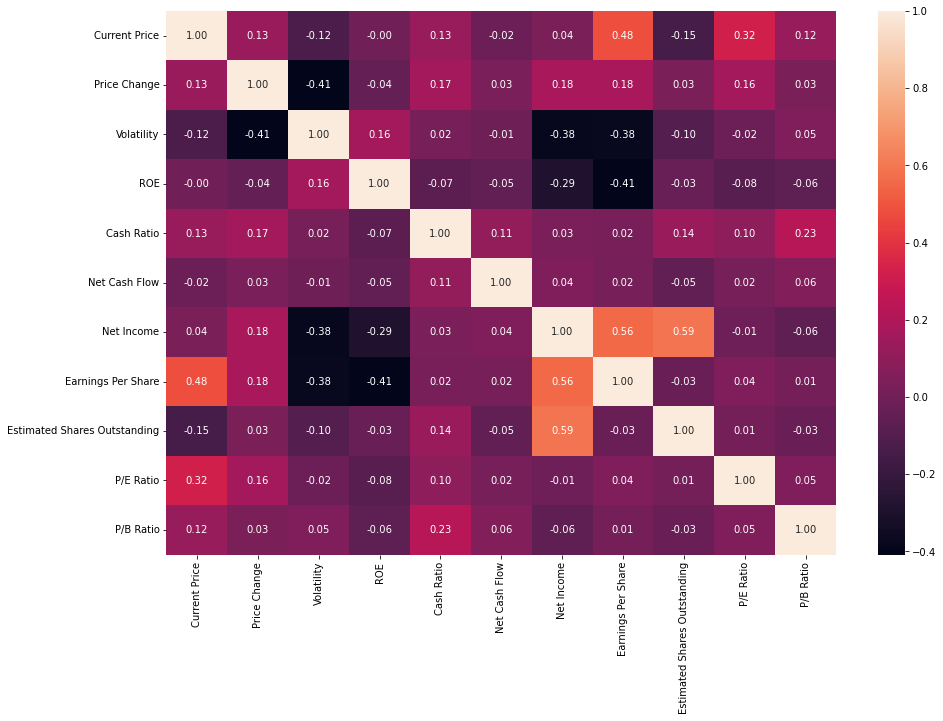

In [16]:
sns.heatmap(stock.corr(),annot=True,fmt='.2f')
plt.gcf().set_size_inches(15,10)

### The highest positive correlations are Net Income with Estimated Shares Outstanding, and Net Income with Earnings Per Share. A slightly lower positive correlation can be found between Current Price and Earnings Per Share.

### The highest negative correlations are ROE with Earnings Per Share, and Price Change with Volatility.

### The pairplot contains many 'cross' shaped scatterplots. Looking closer, most of the axes center around (0,0) for each of these 'crosses'.
#### This seems to indicate that for many numerical variables like P/E Ratio or Net Income, any variation in one coincides with a near-zero value in another.
#### We will keep this in mind when we do our clustering.
## Let's check GICS Sector and GICS Sub Industry vs. all numericals.

In [17]:
def boxplot_plotly(data,x,y,color='#744999'):
    if len(data[x].unique().tolist()) > 20:
        order = data.groupby(x).median().sort_values(y,ascending=False).index.tolist()
        plot = px.box(data,    #median can be changed to mean if needed
              x=x,
              y=y,
              category_orders={x: order},
              color_discrete_sequence=[color]
              )
        plot.update_traces(boxpoints=False) 
        plot.update_xaxes(showticklabels=False)
        plot.update_layout(width=900,height=500,
                                   margin=dict(l=0, r=100, t=40, b=0),
                                   yaxis_title=None,xaxis_title=None,
                                   title='<b>'+x+' + '+y+'</b>',title_x=0.426)
        plot.show()
    else:
        order = data.groupby(x).median().sort_values(y,ascending=False).index.tolist()
        plot = px.box(data,
              x=x,
              y=y,
              category_orders={x: order},
              color_discrete_sequence=[color]
              )
        plot.update_traces(boxpoints=False) 
        plot.update_layout(width=900,height=500,
                                   margin=dict(l=0, r=100, t=40, b=0),
                                   yaxis_title=None,xaxis_title=None,
                                   title='<b>'+x+' + '+y+'</b>',title_x=0.426)
        plot.show()

In [18]:
for categorical in ['GICS Sector','GICS Sub Industry']:
    for column in list(stock.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'],axis=1).columns):
        boxplot_plotly(stock,categorical,column)

### The health care Sector has the greatest median Price Changes, but it appears other Sectors hold better maximums. Let's check the groupby to make sure.

In [19]:
pd.DataFrame(stock.groupby('GICS Sector').max()).reset_index().sort_values('Price Change',ascending=False)

GICS Sector Ticker Symbol                Security  \
6        Information Technology          YHOO               eBay Inc.   
7                     Materials           VMC        Vulcan Materials   
0        Consumer Discretionary           YUM         Yum! Brands Inc   
4                   Health Care           ZTS                  Zoetis   
9   Telecommunications Services            VZ  Verizon Communications   
1              Consumer Staples           TSN             Tyson Foods   
5                   Industrials           XYL              Xylem Inc.   
2                        Energy           XOM           Williams Cos.   
8                   Real Estate            WY      Weyerhaeuser Corp.   
3                    Financials          ZION           Zions Bancorp   
10                    Utilities           XEL         Xcel Energy Inc   

                                  GICS Sub Industry  Current Price  \
6        Technology Hardware, Storage & Peripherals     276.570007   
7                                             Steel     259.600006   
0                                    Tires & Rubber    1274.949951   
4                                   Pharmaceuticals     546.159973   
9            Integrated Telecommunications Services      54.360001   
1                                           Tobacco     127.300003   
5                                          Trucking     217.149994   
2   Oil & Gas Refining & Marketing & Transportation     105.370003   
8                                 Specialized REITs     302.399994   
3                        Thrifts & Mortgage Finance     159.759995   
10                                  Water Utilities     103.889999   

    Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
6      55.051683    3.400491   92         958    12747000000  13190000000   
7      37.489677    3.796410  155         198      915325000   4476000000   
0      34.803917    3.794783  589         260     5607600000   9687000000   
4      33.177346    2.456535  228         425     3428000000  18108000000   
9      24.707504    2.026818  109         496      274000000  17879000000   
1      24.496225    1.718403  582         568     2962000000   7351000000   
5      20.432767    2.954291  601         130     1630000000   7610000000   
2      17.341522    4.580042  917         201     7786000000  16150000000   
8      15.573900    1.594628   48         164     1617921000   2139375000   
3      15.462833    2.230827  596         183    20764000000  24442000000   
10      8.596874    1.389867   20          74     4624000000   2816000000   

    Earnings Per Share  Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
6                13.48                  4.738589e+09  394.413783  129.064585  
7                11.38                  1.074801e+09   57.210844   11.168107  
0                50.09                  3.963978e+09  528.039074   17.201329  
4                15.87                  6.159292e+09  280.514706   42.607500  
9                 9.71                  5.630802e+09   15.924051   10.497704  
1                 4.66                  4.349704e+09   48.412370    7.496831  
5                19.52                  1.038710e+09   41.199999   22.032612  
2                12.50                  4.194805e+09  171.962965   17.345857  
8                 5.88                  2.536364e+09  110.764709   23.856728  
3                12.37                  5.477033e+09   38.721154   19.821416  
10                6.11                  9.311538e+08   33.792080    6.174024

### The Information Technology sector has the greatest maximum price change ($55.1). Let's check to see if this affects that particular IT company's Volatility (Volatility and Price Change had a negative correlation).

In [20]:
stock[stock['Price Change']>55.05]

Ticker Symbol         Security             GICS Sector GICS Sub Industry  \
136          FSLR  First Solar Inc  Information Technology    Semiconductors   

     Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
136      65.989998     55.051683    2.075216   10         190     -355228000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
136   546421000                5.42                   100815682.7  12.175276   

     P/B Ratio  
136  22.563791

In [21]:
stock.groupby('GICS Sector')['Volatility'].mean()

GICS Sector
Consumer Discretionary         1.595478
Consumer Staples               1.152675
Energy                         2.568777
Financials                     1.267255
Health Care                    1.541023
Industrials                    1.416989
Information Technology         1.659801
Materials                      1.816726
Real Estate                    1.206053
Telecommunications Services    1.341612
Utilities                      1.118018
Name: Volatility, dtype: float64

### The average Volatility of the IT Sector is 1.66, but our best Price Change has a 2.08 Volatility.
### It appears First Solar Inc does not follow the trend of Price Change ↑ Volatility ↓.
## One of the issues with this representation of Price Change is that the median ends up near 0. If we had a column which held the absolute value of Price Change, we might get a better correlation between Volatility and Price Change.
### I will add this as a separate column to the dataset (as permanently changing Price Change to its absolute value would remove information from the data).

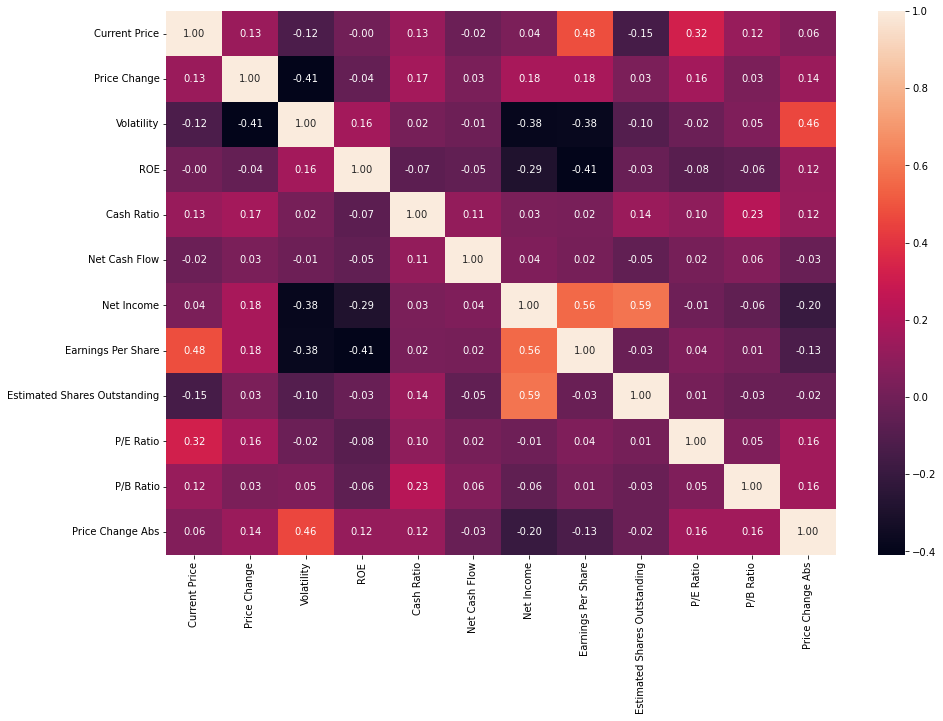

In [22]:
stock['Price Change Abs']=stock['Price Change'].apply(np.abs)
sns.heatmap(stock.corr(),annot=True,fmt='.2f')
plt.gcf().set_size_inches(15,10)

### With the new Absolute Value Price Change column, we see that larger price changes intuitively correspond to larger values of Volatility.

In [23]:
boxplot_plotly(stock,'GICS Sector','Price Change Abs')
boxplot_plotly(stock,'GICS Sector','Volatility')

### Volatility and Absolute Price Change have similar rankings across the Sectors. Consumer Staples and Consumer Discretionary have the largest jumps between the two plots.

### Let's check the GICS Sector vs Cash Ratio averages.

In [24]:
stock.groupby('GICS Sector').mean().reset_index().sort_values('Cash Ratio',ascending=False)

GICS Sector  Current Price  Price Change  Volatility  \
6        Information Technology      63.548485      7.217476    1.659801   
9   Telecommunications Services      32.964000      6.956980    1.341612   
4                   Health Care     132.048250      9.585652    1.541023   
3                    Financials      58.659183      3.865406    1.267255   
1              Consumer Staples      71.972807      8.684750    1.152675   
2                        Energy      46.042334    -10.228289    2.568777   
8                   Real Estate      90.976925      6.205548    1.206053   
0        Consumer Discretionary     128.095404      5.846093    1.595478   
7                     Materials      76.551501      5.589738    1.816726   
5                   Industrials      74.411807      2.833127    1.416989   
10                    Utilities      52.968542      0.803657    1.118018   

          ROE  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
6   21.787879  149.818182   4.830991e+08  1.701587e+09            2.266061   
9   32.600000  117.000000  -1.816800e+09  7.067800e+09            3.550000   
4   27.775000  103.775000   2.626878e+08  2.018515e+09            4.541250   
3   26.285714   98.591837   2.543563e+08  3.202678e+09            4.220408   
1   89.421053   70.947368   2.586272e+08  2.518833e+09            3.224211   
2   93.200000   51.133333  -3.083182e+08 -2.087527e+09           -6.908333   
8   12.444444   50.111111   3.546704e+06  5.677757e+08            2.340000   
0   44.900000   49.575000   8.421318e+07  1.373450e+09            4.525750   
7   33.000000   41.700000  -2.912368e+08  2.785165e+08            3.129000   
5   50.150943   36.188679  -1.601032e+08  1.722373e+09            4.456792   
10   9.875000   13.625000   1.764623e+08  1.107146e+09            2.753125   

    Estimated Shares Outstanding  P/E Ratio  P/B Ratio  Price Change Abs  
6                   8.282789e+08  39.810961   6.377128         12.303200  
9                   2.259575e+09   6.098091 -11.009858          7.877482  
4                   6.845955e+08  36.696777   0.068869         11.332930  
3                   6.838773e+08  15.994403  -4.270505          5.854870  
1                   9.136852e+08  24.017190  -4.554003         10.293075  
2                   6.635288e+08  13.234206   2.539738         15.486212  
8                   3.444540e+08  39.330376  -3.003320          7.411840  
0                   3.996513e+08  31.101004  -8.253543         10.389676  
7                   3.085246e+08  23.414825   0.723103         12.410152  
5                   3.547169e+08  13.947060  -0.979266          8.588945  
10                  3.809193e+08  13.592986  -3.087350          3.665679

### It appears that the Information Technology Sector has a higher mean Cash Ratio by quite a large margin.
### Looking at the GICS Internet Software and Services Sub-Industry, there appears to be a large amount of very high Cash Ratio outliers within 1.5IQR. This may be where the higher mean is being generated from.

In [25]:
boxplot_plotly(stock,'GICS Sub Industry','Cash Ratio')

## Finally, let's check the GICS Sector P/E Ratios again.

In [26]:
boxplot_plotly(stock,'GICS Sector','P/E Ratio')

In [27]:
stock.groupby('GICS Sector').mean().sort_values('P/E Ratio',ascending=False)

Current Price  Price Change  Volatility  \
GICS Sector                                                            
Information Technology           63.548485      7.217476    1.659801   
Real Estate                      90.976925      6.205548    1.206053   
Health Care                     132.048250      9.585652    1.541023   
Consumer Discretionary          128.095404      5.846093    1.595478   
Consumer Staples                 71.972807      8.684750    1.152675   
Materials                        76.551501      5.589738    1.816726   
Financials                       58.659183      3.865406    1.267255   
Industrials                      74.411807      2.833127    1.416989   
Utilities                        52.968542      0.803657    1.118018   
Energy                           46.042334    -10.228289    2.568777   
Telecommunications Services      32.964000      6.956980    1.341612   

                                   ROE  Cash Ratio  Net Cash Flow  \
GICS Sector                                                         
Information Technology       21.787879  149.818182   4.830991e+08   
Real Estate                  12.444444   50.111111   3.546704e+06   
Health Care                  27.775000  103.775000   2.626878e+08   
Consumer Discretionary       44.900000   49.575000   8.421318e+07   
Consumer Staples             89.421053   70.947368   2.586272e+08   
Materials                    33.000000   41.700000  -2.912368e+08   
Financials                   26.285714   98.591837   2.543563e+08   
Industrials                  50.150943   36.188679  -1.601032e+08   
Utilities                     9.875000   13.625000   1.764623e+08   
Energy                       93.200000   51.133333  -3.083182e+08   
Telecommunications Services  32.600000  117.000000  -1.816800e+09   

                               Net Income  Earnings Per Share  \
GICS Sector                                                     
Information Technology       1.701587e+09            2.266061   
Real Estate                  5.677757e+08            2.340000   
Health Care                  2.018515e+09            4.541250   
Consumer Discretionary       1.373450e+09            4.525750   
Consumer Staples             2.518833e+09            3.224211   
Materials                    2.785165e+08            3.129000   
Financials                   3.202678e+09            4.220408   
Industrials                  1.722373e+09            4.456792   
Utilities                    1.107146e+09            2.753125   
Energy                      -2.087527e+09           -6.908333   
Telecommunications Services  7.067800e+09            3.550000   

                             Estimated Shares Outstanding  P/E Ratio  \
GICS Sector                                                            
Information Technology                       8.282789e+08  39.810961   
Real Estate                                  3.444540e+08  39.330376   
Health Care                                  6.845955e+08  36.696777   
Consumer Discretionary                       3.996513e+08  31.101004   
Consumer Staples                             9.136852e+08  24.017190   
Materials                                    3.085246e+08  23.414825   
Financials                                   6.838773e+08  15.994403   
Industrials                                  3.547169e+08  13.947060   
Utilities                                    3.809193e+08  13.592986   
Energy                                       6.635288e+08  13.234206   
Telecommunications Services                  2.259575e+09   6.098091   

                             P/B Ratio  Price Change Abs  
GICS Sector                                               
Information Technology        6.377128         12.303200  
Real Estate                  -3.003320          7.411840  
Health Care                   0.068869         11.332930  
Consumer Discretionary       -8.253543         10.389676  
Consumer Staples             -4.554003         10.293075 

### The P/E Ratio is greatest by Median in Real Estate, but greatest by Mean in IT.

### Let's check the Sub Industries vs. P/E Ratio plot.

In [28]:
boxplot_plotly(stock,'GICS Sub Industry','P/E Ratio')

### The Internet and Direct Marketing Retail & Internet Software and Services Sub-Industries have very tall boxplots, which implies a high amount of upper outliers. These are probably the two Sub-Industries with the biggest impact on IT's P/E ratio.

---
# <ins>Data Preprocessing</ins>

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### We definitely detected features/categories with high outlier counts in Bivariate Analysis. Let's check the outlier ratios.

In [29]:
def ratio_outside_1pt5_IQR(data,column):
    length = 1.5 * np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))
    return np.mean(np.abs(list(data[column])-np.median(data[column]))>length)

def ratio_out_1pt5_outlier_list(data,column):
    outliers=data.loc[np.abs(data[column]-data[column].median())>
    1.5*np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))[0],column]
    outliers
    return outliers

def six_iqr(data,column):
    Sixiqr=6 * np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))
    return np.mean(np.abs(list(data[column])-np.median(data[column]))>Sixiqr)

def six_iqr_outlier_list(data,column):
    outliers=data.loc[np.abs(data[column]-data[column].median())>
    6*np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))[0],column]
    return outliers

for column in list(stock.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'],axis=1).columns):
    print(f'Ratio of {column} points outside 1.5xIQR: {ratio_outside_1pt5_IQR(stock,column)}')
    print(f'Ratio of {column} points outside 6xIQR: {six_iqr(stock,column)}\n')

Ratio of Current Price points outside 1.5xIQR: 0.09411764705882353
Ratio of Current Price points outside 6xIQR: 0.014705882352941176

Ratio of Price Change points outside 1.5xIQR: 0.11764705882352941
Ratio of Price Change points outside 6xIQR: 0.0

Ratio of Volatility points outside 1.5xIQR: 0.10588235294117647
Ratio of Volatility points outside 6xIQR: 0.0

Ratio of ROE points outside 1.5xIQR: 0.15294117647058825
Ratio of ROE points outside 6xIQR: 0.06470588235294118

Ratio of Cash Ratio points outside 1.5xIQR: 0.08529411764705883
Ratio of Cash Ratio points outside 6xIQR: 0.0058823529411764705

Ratio of Net Cash Flow points outside 1.5xIQR: 0.29411764705882354
Ratio of Net Cash Flow points outside 6xIQR: 0.07941176470588235

Ratio of Net Income points outside 1.5xIQR: 0.20294117647058824
Ratio of Net Income points outside 6xIQR: 0.041176470588235294

Ratio of Earnings Per Share points outside 1.5xIQR: 0.17058823529411765
Ratio of Earnings Per Share points outside 6xIQR: 0.0176470588235

### ROE, Net Cash Flow, and Net Income are the target features with the highest outliers.
    Replot these as histoboxes.

In [30]:
for column in ['ROE','Net Cash Flow','Net Income']:
    histobox(stock,column)

### As both KMeans and Hierarchical Clustering are sensitive to outliers, I will replace the points outside of 6xIQR with the highest and lowest points of this range (IE: 6IQR trimmed minimum and maximum).

In [31]:
data=stock
column_list=['ROE','Net Cash Flow','Net Income']

for column in column_list:
    list_ = six_iqr_outlier_list(data,column).index.tolist()
    for item in list_:
        if data.iloc[item,data.columns.get_loc(column)] > data[column].median():
            data.iloc[item,data.columns.get_loc(column)] = 6*np.diff(
                np.quantile(
                    data[column][data[column].notnull()],[.25,.75]))+data[column].median()
        else:
            data.iloc[item,data.columns.get_loc(column)] = data[column].median()-6*np.diff(
                np.quantile(
                    data[column][data[column].notnull()],[.25,.75]))

In [32]:
for column in ['ROE','Net Cash Flow','Net Income']:
    histobox(stock,column)

### Now our means are within their respective Interquartile Ranges, without sacrificing the positions of the outliers by replacing them with pure medians.

---

### Seeing as the data doesn't need binning, there are no columns with high enough correlation to drop, and all transformations/columns to-be-added are added (like Price Change Abs), We will move on to our final EDA checks, then do our clustering.

# <ins>Second EDA</ins>

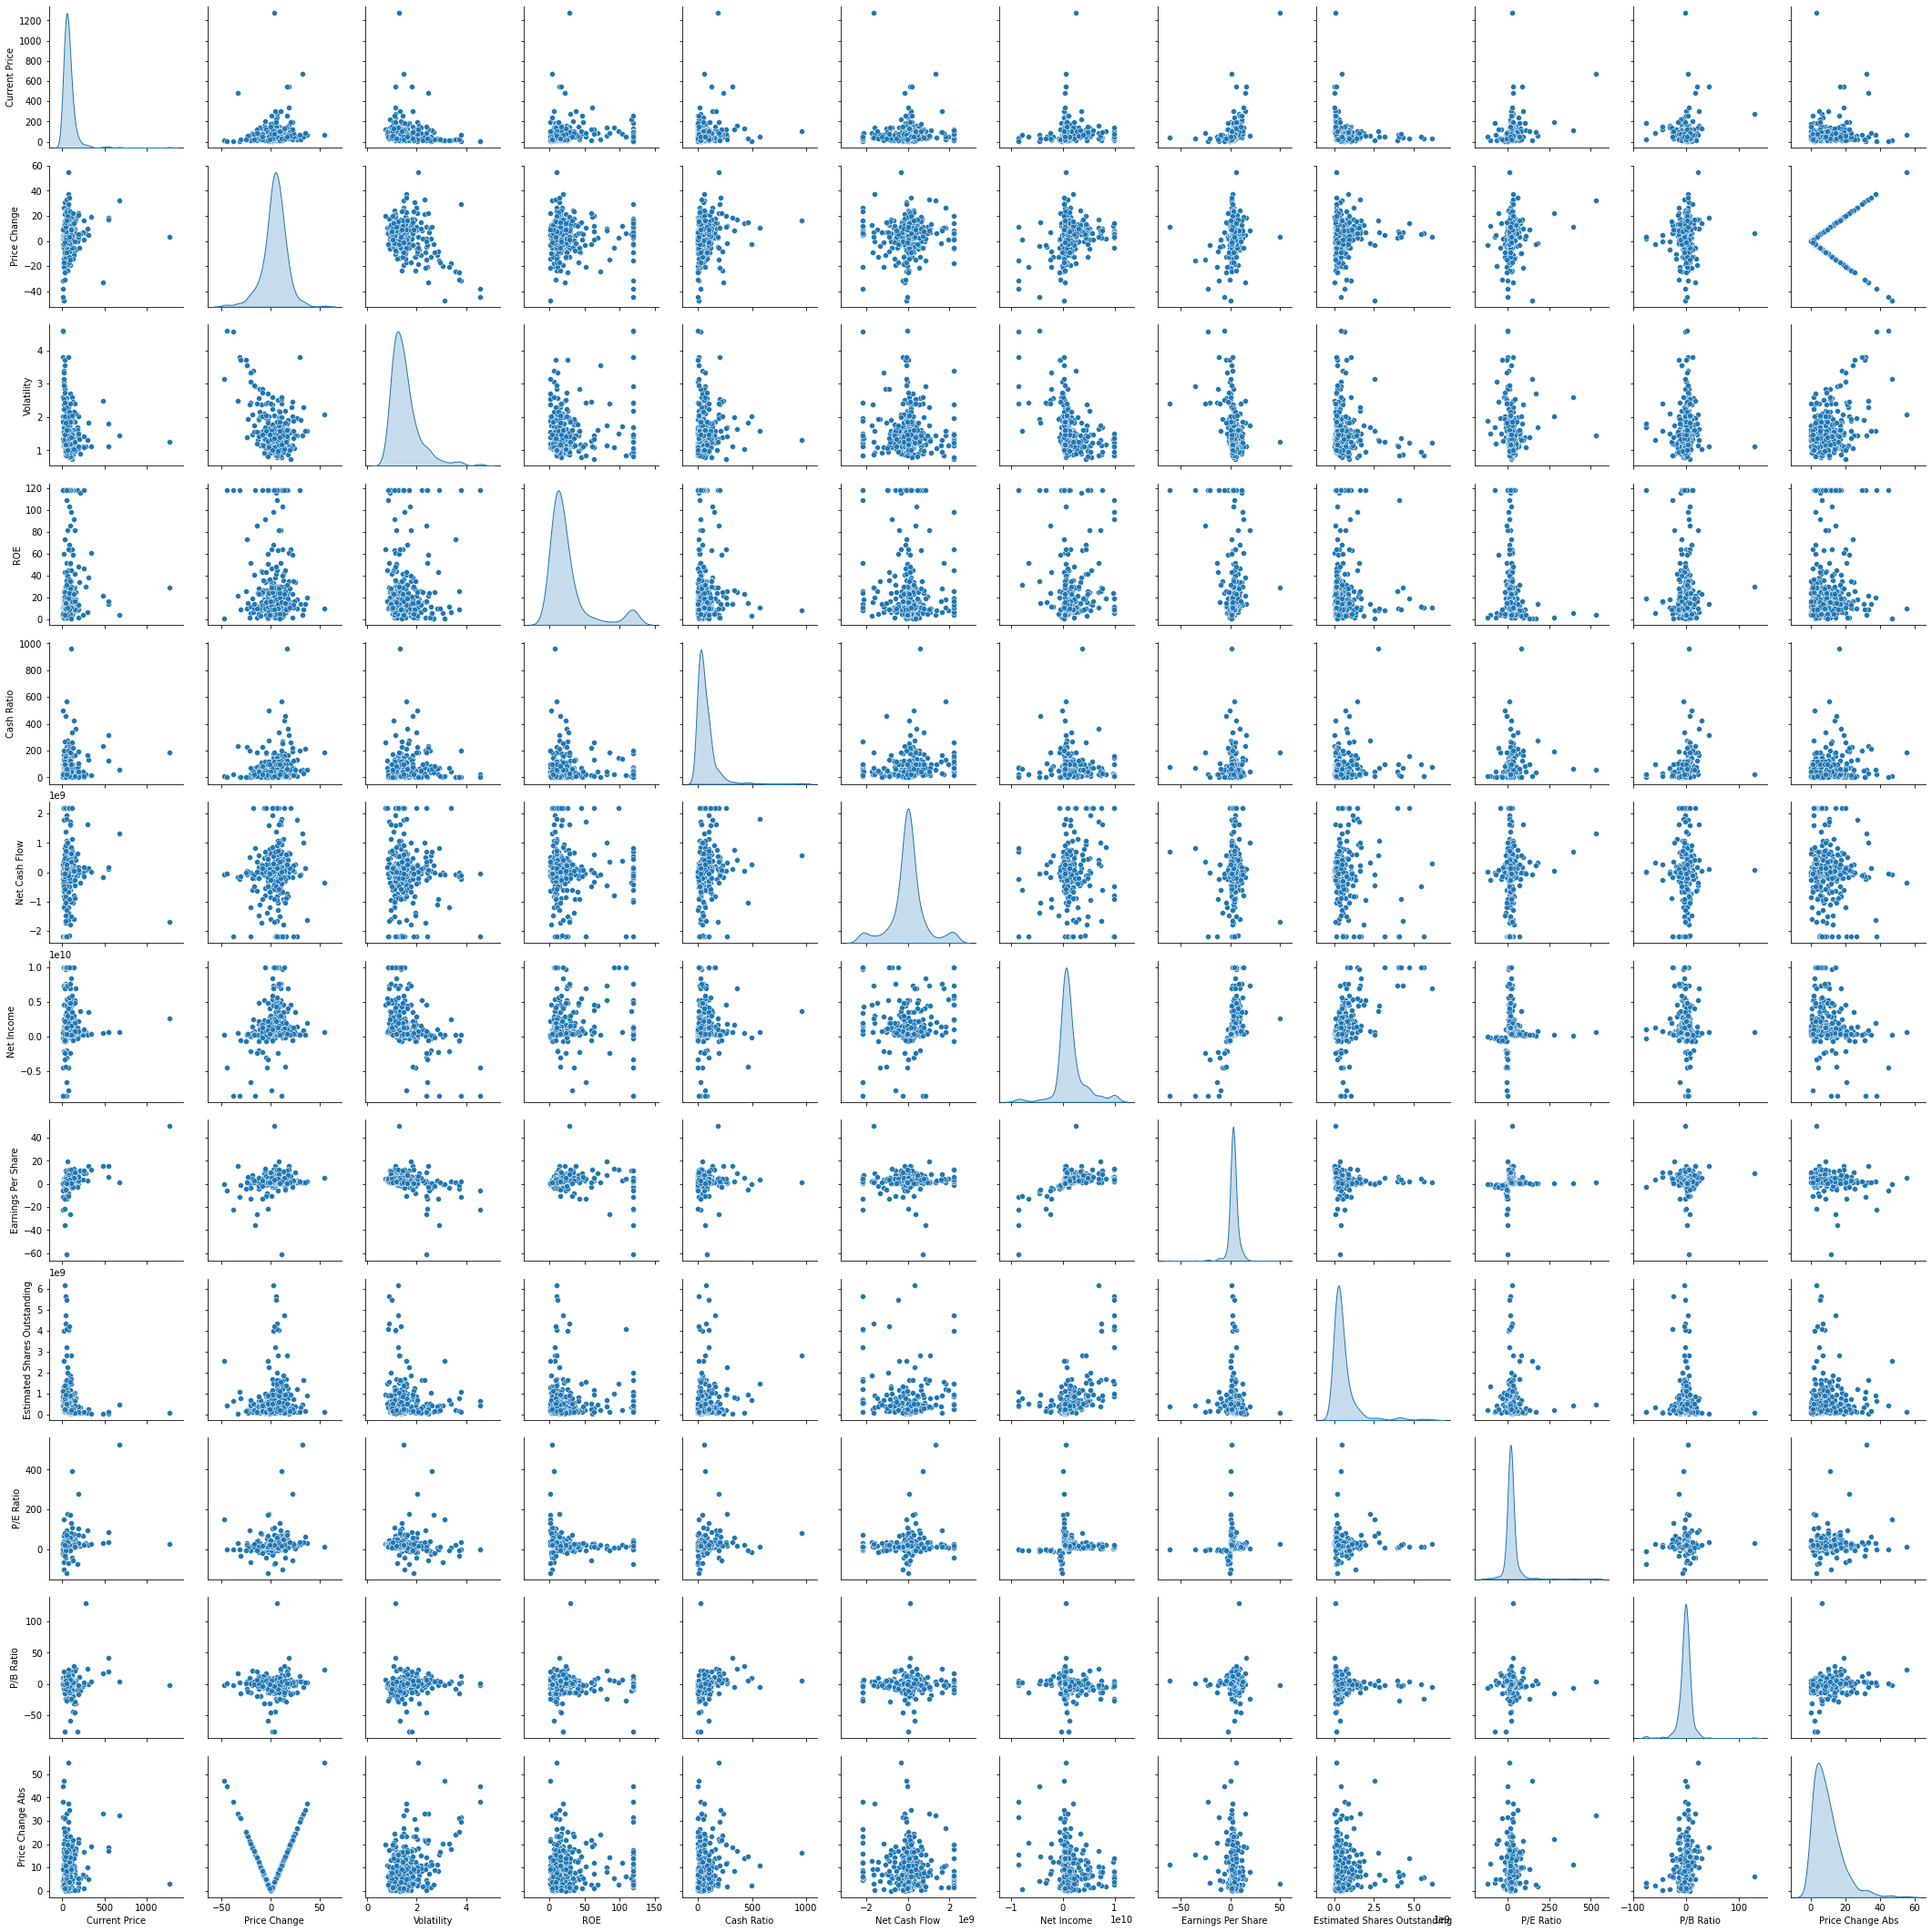

In [33]:
sns.pairplot(stock,diag_kind='kde');

### The only column different from the previous pairplot is Price Change Abs. There is obviously going to be a strange correlation between Price Change and Price Change Abs, as the latter is made from the former.
## Let's move on to clustering.
---
---
---


# <ins>K-means Clustering</ins>

In [34]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.stats import zscore
# silhouette score and visualizer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
# It is heavily recommended to use filterwarnings for KMeans, as there is a memory issue on windows. 

In [35]:
stock_numerical = stock.drop(['Ticker Symbol','Security','GICS Sector','GICS Sub Industry'],axis=1)

stock_scaled = stock_numerical.apply(zscore)

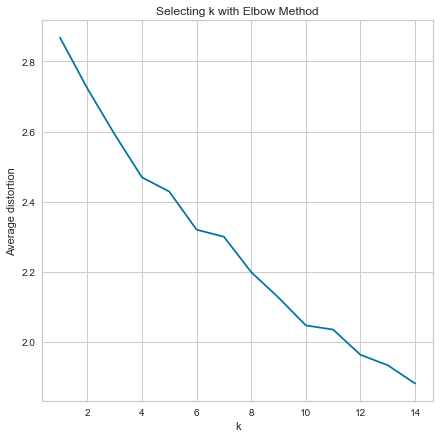

In [36]:
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(stock_scaled)
    prediction=model.predict(stock_scaled)
    meanDistortions.append(sum(np.min(cdist(
        stock_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / stock_scaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with Elbow Method')
plt.gcf().set_size_inches(7,7)

### 9 Clusters seems to be where the reduction in distortion begins to slow down.

### Let's check 9 in the Silhouette Visualizer.

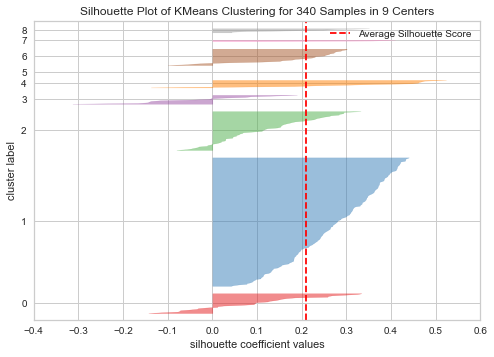

In [37]:
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(stock_scaled)
visualizer.show();

# The silhouette scores for clusters 0 and 3 look awful, and some coefficient values are negative. Let's check more options.

In [38]:
def KMeans_cluster_search(data,range_=range(2,25),r=None): #r is random state.
    clusters=range_
    meanDistortions=[]
    silhouette_coefficients = []

    for k in clusters:
        model=KMeans(n_clusters=k,random_state=r)
        model.fit(data)
        prediction=model.predict(data)
        meanDistortions.append(sum(np.min(cdist(
            data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
        score = silhouette_score(data, model.labels_,random_state=r)
        silhouette_coefficients.append([k,score])

    fig = plt.figure()

    fig.add_subplot(1,2,1)
    plt.plot(clusters, meanDistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with Elbow Method')


    fig.add_subplot(1,2,2)
    plt.plot(clusters,pd.DataFrame(silhouette_coefficients)[1])
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Selecting k with Elbow Method, using Silhouette Coefficients')

    plt.gcf().set_size_inches(15,5)

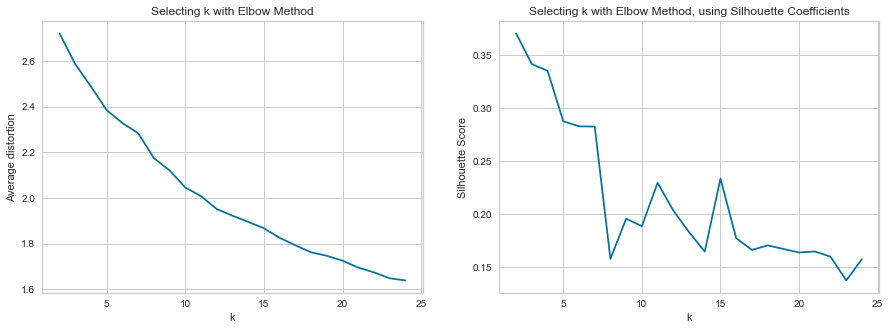

In [39]:
KMeans_cluster_search(stock_scaled)

### I want to keep the clusters at 10 or below for this data. The best k values are 8 and 9.
### We want to find a k value and a random_state at which we minimize the negative values, but also bolster the performance of the worst cluster.
### We will attempt to find a perfect set of values below.

In [40]:
from random import randrange

In [41]:
# Returns the best k-value, the best random_state, and the silhouette score, in that order.
def find_best_random_k(data,clusters_to_check=[5],random_count=10):
    list_1 = []
    list_2 = []
    list_3 = []
    list_4 = []
    list_5 = []
    list_final = []
    random_range = []
    for a in range(random_count):
        random_range.append(randrange(999999999))
    for entry in clusters_to_check:
        for i in random_range:
            model=KMeans(n_clusters=entry,random_state=i)
            model.fit(data)
            sillyscore = silhouette_score(data, model.labels_,random_state=i)
            score = metrics.silhouette_samples(data, model.labels_)
            hi_means_list = []
            lo_means_list = []
            for label in range(entry):
                hi_means_list.append(score[model.labels_ == label].max())
            for label in range(entry):
                lo_means_list.append(score[model.labels_ == label].min())
            
            """
            Choose between these 5 scoring methods: 
            
            1) worst low + worst high (good for raising the worst cluster as much as possible),
            2) worst low (good for raising negative cluster values as much as possible),
            3) worst high (good for trying to get every cluster above the average)
            4) minimize the no. of negative silhouette scores, for particularly bad clusters
            5) just gives the best k for silhouette score.
            
            """
            
            score1 = ((min(lo_means_list)-sillyscore)+(min(hi_means_list)-sillyscore))/2
            score2 = (min(lo_means_list)-sillyscore)
            score3 = (min(hi_means_list)-sillyscore)
            score4 = (len(metrics.silhouette_samples(data, model.labels_)[metrics.silhouette_samples(data, model.labels_)<0]))
            
            list_1.append([entry,i,score1,sillyscore])
            list_2.append([entry,i,score2,sillyscore])
            list_3.append([entry,i,score3,sillyscore])
            list_4.append([entry,i,score4,sillyscore])
            list_5.append([entry,i,sillyscore])
            
    for entry in list_1:
        list_final.append(entry[2])
    print(f"The best AVG Bad Cluster k value is {list_1[list_final.index(max(list_final))][0]}, the best random_state is {list_1[list_final.index(max(list_final))][1]}, and the best silhouette score is {list_1[list_final.index(max(list_final))][3]}.")
    list_final = []
    
    for entry in list_2:
        list_final.append(entry[2])
    print(f"The best LOW Bad Cluster k value is {list_2[list_final.index(max(list_final))][0]}, the best random_state is {list_2[list_final.index(max(list_final))][1]}, and the best silhouette score is {list_2[list_final.index(max(list_final))][3]}.")
    list_final = []
    
    for entry in list_3:
        list_final.append(entry[2])
    print(f"The best HIGH Bad Cluster k value is {list_3[list_final.index(max(list_final))][0]}, the best random_state is {list_3[list_final.index(max(list_final))][1]}, and the best silhouette score is {list_3[list_final.index(max(list_final))][3]}.")
    list_final = []
    
    for entry in list_4:
        list_final.append(entry[2])
    print(f"The best k value to minimize negative scores is {list_4[list_final.index(min(list_final))][0]}, the best random_state is {list_4[list_final.index(min(list_final))][1]}, and the number of negative scores is {list_4[list_final.index(min(list_final))][2]}.")
    list_final = []
    
    for entry in list_5:
        list_final.append(entry[2])
    print(f"The best k value to maximize silhouette score is {list_5[list_final.index(max(list_final))][0]}, the best random_state is {list_5[list_final.index(max(list_final))][1]}, and the best silhouette score is {list_5[list_final.index(max(list_final))][2]}.")

    print('\n')

In [42]:
%%time
find_best_random_k(stock_scaled,clusters_to_check=[8,9],random_count=25)

The best AVG Bad Cluster k value is 9, the best random_state is 172432487, and the best silhouette score is 0.21592477070177166.
The best LOW Bad Cluster k value is 9, the best random_state is 172432487, and the best silhouette score is 0.21592477070177166.
The best HIGH Bad Cluster k value is 9, the best random_state is 172432487, and the best silhouette score is 0.21592477070177166.
The best k value to minimize negative scores is 8, the best random_state is 942341241, and the number of negative scores is 24.
The best k value to maximize silhouette score is 8, the best random_state is 827578643, and the best silhouette score is 0.2727051307818301.


CPU times: total: 3min 5s
Wall time: 13.2 s


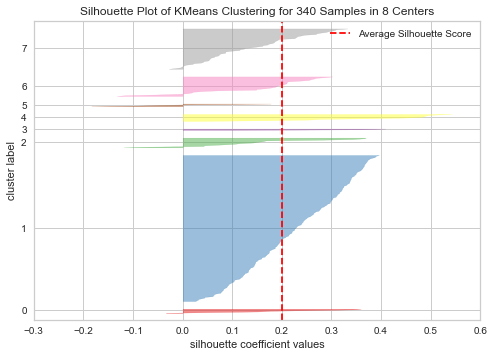

In [43]:
#Best after long term runs is 8, 393007990, numb. negative silhouette scores = 14

visualizer = SilhouetteVisualizer(KMeans(8,random_state=393007990))
visualizer.fit(stock_scaled)
visualizer.show();

### While I could not find any k-values at which every cluster had positive coefficient values, 8 gave the fewest negative silhouettes at the lowest amount of clusters possible.

In [44]:
# Fit the final model with the best K.
final_model=KMeans(8,random_state=393007990)
final_model.fit(stock_scaled)
prediction=final_model.predict(stock_scaled)

# Add the cluster prediction as a column to the Model and Scaled Model.
stock['KMeans Cluster #']=prediction
stock_scaled['KMeans Cluster #']=prediction

#Check the means of each feature within each cluster:

stock_Cluster=stock.groupby('KMeans Cluster #')
stock_Cluster.mean()

Current Price  Price Change  Volatility        ROE  \
KMeans Cluster #                                                       
0                     86.987620     11.306966    1.636317  16.000000   
1                     68.687335      0.881088    1.436766  15.772512   
2                     27.199334    -22.231436    3.258965  67.933333   
3                    327.006671     21.917380    2.029752   4.000000   
4                     44.410000      6.619587    1.116804  24.363636   
5                    624.079986      2.395375    1.557535  22.400000   
6                     99.701592      7.095135    1.255558  95.741379   
7                     76.304915     18.621960    1.572249  20.974576   

                  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
KMeans Cluster #                                                                
0                 514.428571   4.080136e+08  1.238672e+09            2.422857   
1                  56.028436   6.482849e+07  1.142038e+09            3.069834   
2                  33.800000  -3.436389e+08 -3.779054e+09          -14.479333   
3                 106.000000   6.982407e+08  2.875470e+08            0.750000   
4                  65.454545  -8.412931e+08  9.207609e+09            3.585455   
5                 178.400000  -2.954556e+08  9.696718e+08           19.268000   
6                  57.689655   2.661349e+08  3.665411e+09            5.853793   
7                  72.457627  -2.074488e+08  1.045644e+09            3.199492   

                  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
KMeans Cluster #                                                        
0                                 1.074192e+09   24.377696   9.527519   
1                                 4.079609e+08   21.260377  -3.016992   
2                                 5.730831e+08    3.312816  -1.392759   
3                                 3.667632e+08  400.989188  -5.322376   
4                                 4.309878e+09   14.565941  -5.284072   
5                                 5.783248e+07   42.051273  41.645997   
6                                 6.772777e+08   17.767715  -3.252045   
7                                 4.331379e+08   25.320267  -0.563549   

                  Price Change Abs  
KMeans Cluster #                    
0                        11.964467  
1                         5.947222  
2                        23.751143  
3                        21.917380  
4                         6.619587  
5                        15.647883  
6                         8.360991  
7                        18.621960

In [45]:
def KMeans_boxplot(data,ClusterColumn):
    collist=data.drop([ClusterColumn],axis=1).columns.tolist()
    colors=sns.color_palette('Set1',(len(collist))).as_hex()
    plot=make_subplots(rows=(round((len(data.columns)-0.5)/2)),
                       cols=2,
                       subplot_titles=tuple(collist),
                       shared_xaxes=True,
                       vertical_spacing = 0.04)
    count = 0
    rowcount=1
    while rowcount < 1+(round((len(data.columns)-0.5)/2)):
        colcount=1
        while colcount<3:
            column=collist[count]
            plot.add_trace(go.Box(x=data[ClusterColumn],
                                y=data[column],
                                line={'color': '#71797E'},
                                fillcolor=colors[count],name=str(collist[count])
                      ),
                row=rowcount,col=colcount)
            count=count+1
            colcount=colcount+1
        rowcount=rowcount+1
    plot.update_traces(boxpoints=False)
    plot.update_layout(width=950,height=rowcount*200,
                       margin=dict(l=0, r=0, t=100, b=0),
                       title='<b>'+ClusterColumn+'</b>',
                       title_x=0.299)
    plot.show()

In [46]:
KMeans_boxplot(stock_scaled,'KMeans Cluster #')

&nbsp; &nbsp; The highest **Current Prices**  are in **cluster 5**.

&nbsp; &nbsp; The highest **Price Changes** are in **cluster 3**. The lowest changes to Price Changes occur in cluster 0, 4, and 6. For investors who are risk averse, these are the clusters to watch.

&nbsp; &nbsp; The highest **Volatility** is **cluster 2**, the lowest are still 0, 4, and 6.

&nbsp; &nbsp; The best **ROE** clusters are **2 and 6**.

&nbsp; &nbsp; The best **Cash Ratio** cluster is **0**.

&nbsp; &nbsp; **Net Cash Flow** is best in **cluster 3**, and worst in cluster 4.

&nbsp; &nbsp; **Net Income** is best in **cluster 4**, and worst in cluster 2.

&nbsp; &nbsp; **Earnings Per Share** is **fairly even** across all clusters, but cluster 2 is the worst.

&nbsp; &nbsp; **Estimated Shares Outstanding** is the highest in **cluster 4**.

&nbsp; &nbsp; The best **P/E Ratio** is **cluster 3**, by far.

&nbsp; &nbsp; **P/B Ratio** is almost completely static across all clusters, but **cluster 5** is the best.

&nbsp; &nbsp; **Price Change Absolute** has its highest clusters at **2 and 3**. 0, 4, and 6 are the least volatile.

## These clusters can be used to choose groups of stocks for individual investors, based upon their profile.

#### For instance, if I am a risk-averse investor who is looking for a non-Volatile stock in conjunction with high Net Income, I might choose my stocks from cluster 4, which has the best company Net Incomes and 3rd lowest Volatility.

In [47]:
stock[stock['KMeans Cluster #']==4].head(10)

Ticker Symbol                Security                  GICS Sector  \
52              C          Citigroup Inc.                   Financials   
123             F              Ford Motor       Consumer Discretionary   
142            GM          General Motors       Consumer Discretionary   
167          INTC             Intel Corp.       Information Technology   
177           JPM    JPMorgan Chase & Co.                   Financials   
181            KO       Coca Cola Company             Consumer Staples   
246           PFE             Pfizer Inc.                  Health Care   
287             T                AT&T Inc  Telecommunications Services   
317            VZ  Verizon Communications  Telecommunications Services   
320           WFC             Wells Fargo                   Financials   

                          GICS Sub Industry  Current Price  Price Change  \
52                                    Banks      51.750000      4.714695   
123                Automobile Manufacturers      14.090000      2.398256   
142                Automobile Manufacturers      34.009998     12.281271   
167                          Semiconductors      34.450001     14.035095   
177                                   Banks      66.029999      8.033377   
181                             Soft Drinks      42.959999      6.812526   
246                         Pharmaceuticals      32.279999      3.130991   
287  Integrated Telecommunications Services      34.410000      5.942118   
317  Integrated Telecommunications Services      46.220001      6.277303   
320                                   Banks      54.360001      5.532912   

     Volatility    ROE  Cash Ratio  Net Cash Flow  Net Income  \
52     1.261984    8.0          99    -2180205500  9987528500   
123    1.151454   26.0          43     2184401500  7373000000   
142    1.344514   24.0          33    -2180205500  9687000000   
167    1.226022   19.0         162     2184401500  9987528500   
177    1.130337   10.0          99    -2180205500  9987528500   
181    0.889913   29.0          74    -1649000000  7351000000   
246    1.238748   11.0          79      298000000  6960000000   
287    0.859442   11.0          11    -2180205500  9987528500   
317    0.842592  109.0          14    -2180205500  9987528500   
320    0.969774   12.0          99     -460000000  9987528500   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
52                 5.41                  3.187061e+09   9.565619  -1.167533   
123                1.86                  3.963978e+09   7.575269   5.108756   
142                6.11                  1.585434e+09   5.566284  -4.892037   
167                2.41                  4.738589e+09  14.294606   3.954975   
177                6.05                  4.040000e+09  10.914049  -1.886881   
181                1.69                  4.349704e+09  25.420118  -1.466307   
246                1.13                  6.159292e+09  28.566371  -4.213309   
287                2.37                  5.630802e+09  14.518987 -23.537323   
317                4.38                  4.081963e+09  10.552512 -26.380687   
320                4.18                  5.477033e+09  13.004785  -0.938007   

     Price Change Abs  KMeans Cluster #  
52           4.714695                 4  
123          2.398256                 4  
142         12.281271                 4  
167         14.035095                 4  
177          8.033377                 4  
181          6.812526                 4  
246          3.130991                 4  
287          5.942118                 4  
317          6.277303                 4  
320          5.532912                 4

### Let's finish up KMeans...

In [48]:
# Check the maximums of each column, by each cluster.
cluster_profile = stock.groupby("KMeans Cluster #").mean()
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [49]:
#check the minimums of each column, by each cluster.
cluster_profile.style.highlight_min(color="pink", axis=0)

### Above are the maximums and minimums for each column, for each cluster, highlighted green and red respectively.
### Not all features are *bad* at the minimums. Example: Current Price.
### The 7th cluster holds none of the minimums or maximums.

### With these KMeans Clusters provided, you can make more educated decisions about your customer's investments.

---
---
---

# <ins>Hierarchical Clustering</ins>

In [50]:
#Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 

#cophenet for Cophenetic Coefficient for cluster performance,
#dendrogram to make the dendrogram,
#linkage to calculate the distances between points (single linkage, complete linkage, average linkage,
                                                  # centroid linkage, and ward.)
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

#pdist to measure pairwise distances between observations (used for 'dendrogram distance' in cophenet)
from scipy.spatial.distance import pdist

In [51]:
stock_scaled_agg=stock_scaled.drop('KMeans Cluster #',axis=1)
stock_scaled_agg

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0        -0.393341      0.493950    0.272749  3.095077   -0.210698   
1        -0.220837      0.355439    1.137045  3.095077    0.077269   
2        -0.367195      0.602479   -0.427007 -0.169897   -0.033488   
3         0.133567      0.825696   -0.284802 -0.571740    1.218059   
4        -0.260874     -0.492636    0.296470 -0.404305    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.370818    4.308162   
336      -0.289510     -1.065766   -0.079703  3.095077   -0.476513   
337       0.221913      0.439539   -0.206067 -0.839635    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.739174    0.320933   
339      -0.336453      1.051046    0.142671  0.198459   -0.055639   

     Net Cash Flow  Net Income  Earnings Per Share  \
0        -0.732242    2.307376            1.309399   
1         0.068764    1.394598            0.056755   
2         1.153484    1.127723            0.024831   
3        -0.288130   -0.276403           -0.230563   
4         0.391758   -0.251482           -0.374982   
..             ...         ...                 ...   
335      -1.255876   -2.122920           -1.127481   
336       0.200838   -0.030830            0.029391   
337       0.466209   -0.455017           -0.303532   
338      -0.046952   -0.394879           -0.239684   
339       0.339027   -0.383949           -0.318734   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  Price Change Abs  
0                        0.107863  -0.447824  -0.506653          0.052165  
1                        1.250274  -0.120789  -0.504205         -0.147992  
2                        1.098021  -0.197319   0.094941          0.208998  
3                       -0.091622   1.087574   0.424333          0.531561  
4                        1.978399   3.339518   0.199196         -0.932871  
..                            ...        ...        ...               ...  
335                      0.429111  -0.683784   0.572194          0.641313  
336                     -0.167741  -0.145154  -0.152012         -0.104661  
337                     -0.460058   2.322399  -1.589390         -0.026462  
338                     -0.377852  -0.035310   0.118680         -1.013543  
339                     -0.092942   0.999032   0.246754          0.857206  

[340 rows x 12 columns]

In [52]:
Z_best = None
c_best = None
best_methods = []
final_method = None
list_of_c = []
for method in ['ward', 'complete', 'average', 'single']:
    Z = linkage(stock_scaled_agg, metric='euclidean', method=method)
    c, coph_dists = cophenet(Z, pdist(stock_scaled_agg))

    print(f"Cophenetic Correlation for {method}: {c}")

    if len(list_of_c) == 0:
        best_methods.append(method)
        final_method = method
        Z_best = Z
        c_best = c
    else:
        if c >= max(list_of_c):
            if c > max(list_of_c):
                del best_methods
                best_methods = []
                best_methods.append(method)
                final_method = method
                Z_best = Z
                c_best = c
            else:
                best_methods.append(method)
                final_method = method
                Z_best = Z
                c_best = c
        elif c < max(list_of_c):
            continue

    list_of_c.append(c)            

print('')
print(f"The best method(s) is/are {best_methods} and the best Cophenetic Coefficient is {c_best}.")
print(f"The method currently assigned to Z_best is '{final_method}'.")

Cophenetic Correlation for ward: 0.6640159241326841
Cophenetic Correlation for complete: 0.825455691724657
Cophenetic Correlation for average: 0.9215434765843936
Cophenetic Correlation for single: 0.8922886995278894

The best method(s) is/are ['average'] and the best Cophenetic Coefficient is 0.9215434765843936.
The method currently assigned to Z_best is 'average'.


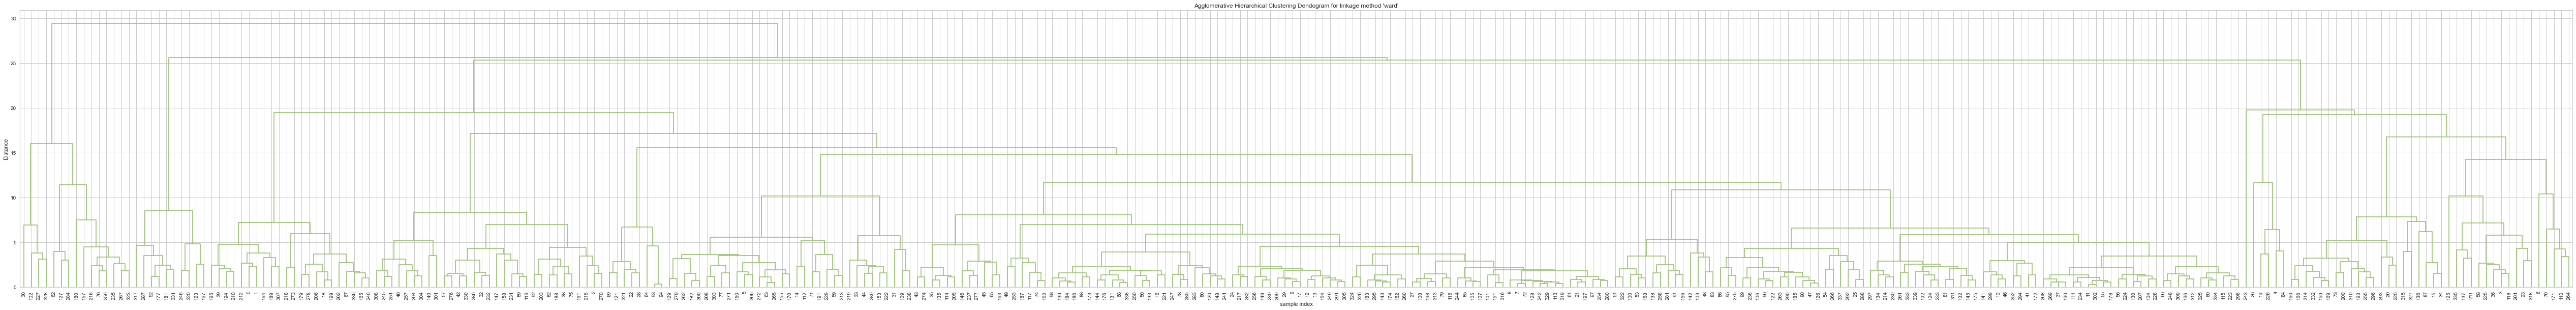

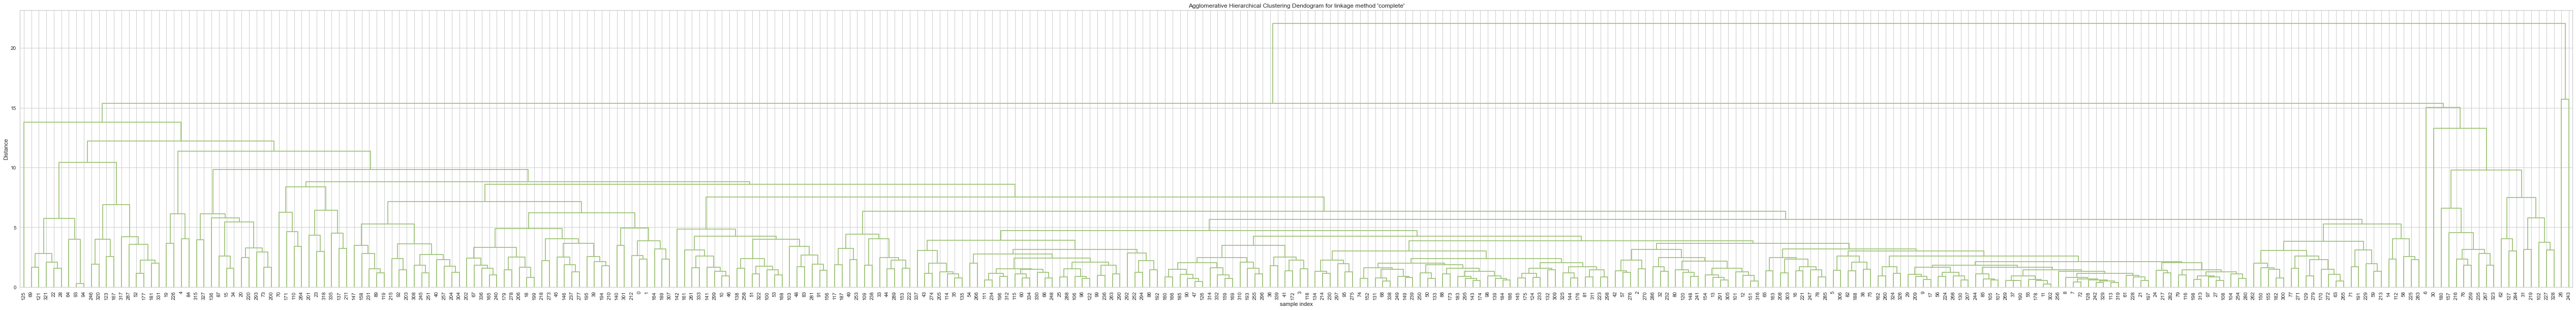

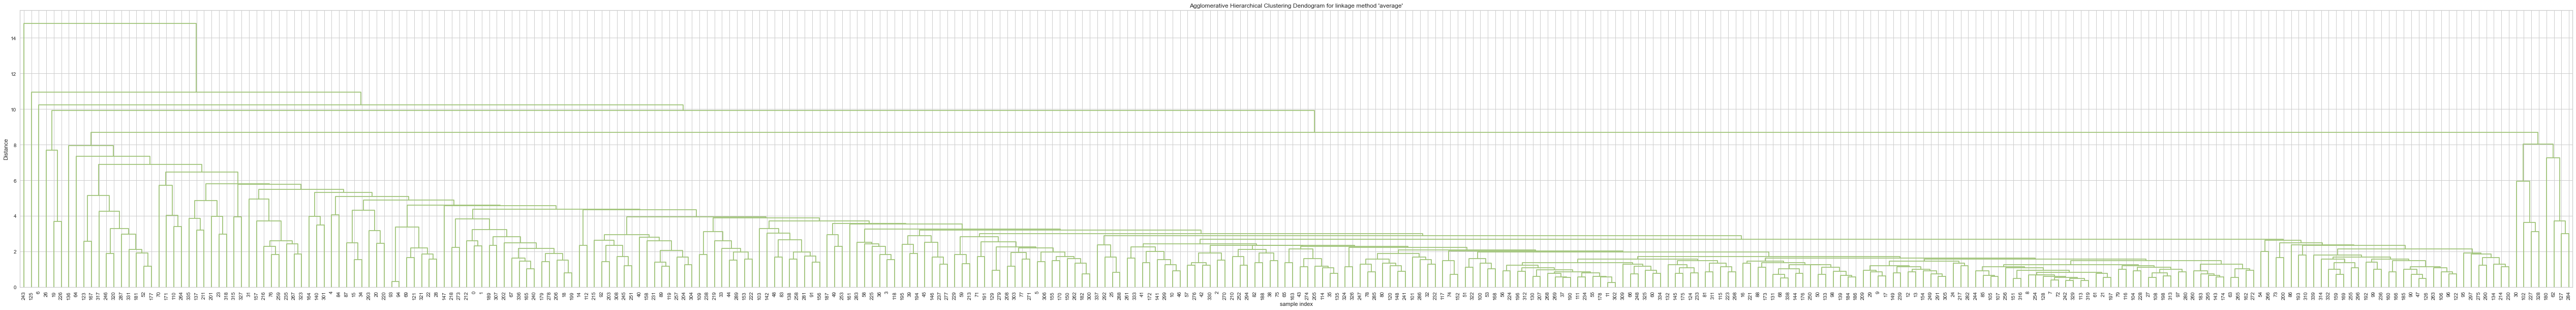

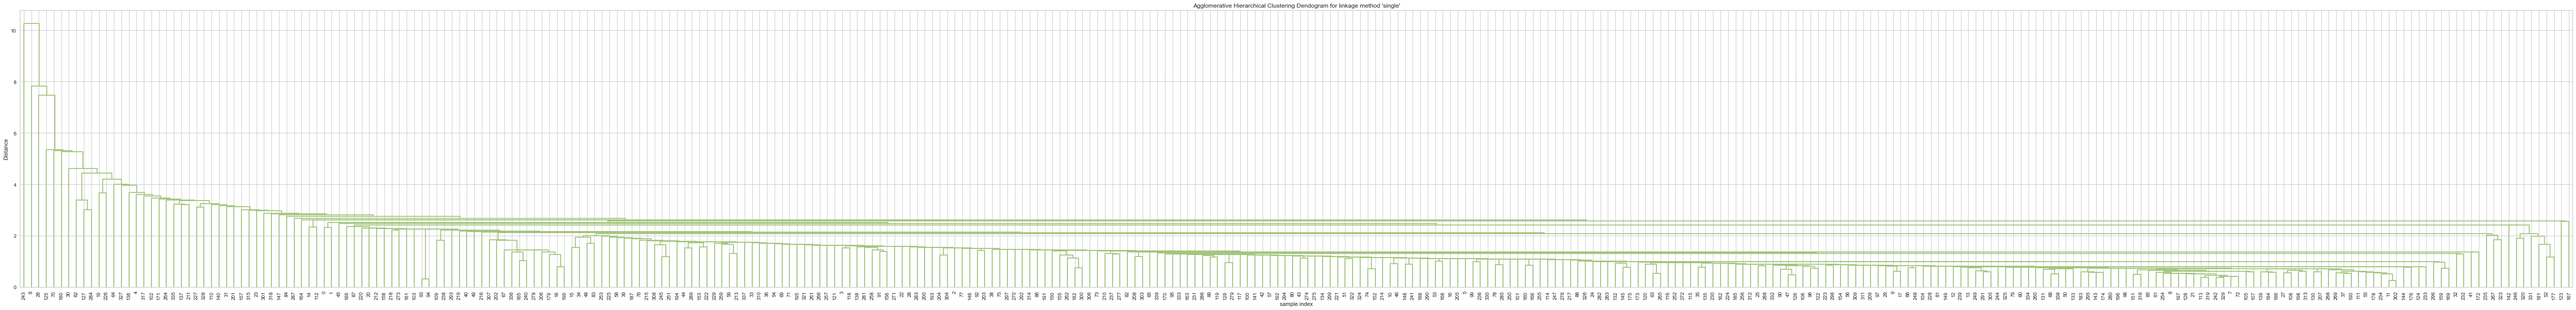

In [53]:
for method in ['ward', 'complete', 'average', 'single']:
    plt.figure(figsize=(90, 10))
    plt.title(f"Agglomerative Hierarchical Clustering Dendogram for linkage method '{method}'")
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(linkage(stock_scaled_agg, metric='euclidean', method=method), leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. );

### The two best methods are average and single. Every method except ward will create 4+ clusters with 1 ticker, but ward has a cophenetic coefficient of less than 0.70, which makes it unusable.

### We will continue with average as our method, with 7 clusters.

In [54]:
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean',  linkage=final_method) #shift+tab for more linkages
                               #use a count of n_clusters based on dendogram

model.fit(stock_scaled_agg)

stock_scaled_agg['Agglomerative Cluster #'] = model.labels_
stock['Agglomerative Cluster #'] = model.labels_

stock.head(10)
#to check your clusters

Ticker Symbol                   Security             GICS Sector  \
0           AAL    American Airlines Group             Industrials   
1          ABBV                     AbbVie             Health Care   
2           ABT        Abbott Laboratories             Health Care   
3          ADBE          Adobe Systems Inc  Information Technology   
4           ADI       Analog Devices, Inc.  Information Technology   
5           ADM  Archer-Daniels-Midland Co        Consumer Staples   
6           ADS      Alliance Data Systems  Information Technology   
7           AEE                Ameren Corp               Utilities   
8           AEP    American Electric Power               Utilities   
9           AFL                  AFLAC Inc              Financials   

                       GICS Sub Industry  Current Price  Price Change  \
0                               Airlines      42.349998      9.999995   
1                        Pharmaceuticals      59.240002      8.339433   
2                  Health Care Equipment      44.910000     11.301121   
3                   Application Software      93.940002     13.977195   
4                         Semiconductors      55.320000     -1.827858   
5                  Agricultural Products      36.680000    -12.017268   
6  Data Processing & Outsourced Services     276.570007      6.189286   
7                         MultiUtilities      43.230000      2.174424   
8                     Electric Utilities      58.270000      2.371753   
9                Life & Health Insurance      59.900002      3.027181   

   Volatility    ROE  Cash Ratio  Net Cash Flow  Net Income  \
0    1.687151  118.5          51     -604000000  7610000000   
1    2.197887  118.5          77       51000000  5144000000   
2    1.273646   21.0          67      938000000  4423000000   
3    1.357679    9.0         180     -240840000   629551000   
4    1.701169   14.0         272      315120000   696878000   
5    1.516493   10.0          49     -189000000  1849000000   
6    1.116976   30.0          25       90885000   596541000   
7    1.124186    9.0          14      287000000   636000000   
8    1.068485   11.0           9       13900000  2052300000   
9    1.048295   14.0          99     -308000000  2533000000   

   Earnings Per Share  Estimated Shares Outstanding   P/E Ratio   P/B Ratio  \
0               11.39                  6.681299e+08    3.718174   -8.784219   
1                3.15                  1.633016e+09   18.806350   -8.750068   
2                2.94                  1.504422e+09   15.275510   -0.394171   
3                1.26                  4.996437e+08   74.555557    4.199651   
4                0.31                  2.247994e+09  178.451613    1.059810   
5                2.99                  6.183946e+08   12.267559    7.496831   
6                8.91                  6.695185e+07   31.040405  129.064585   
7                2.60                  2.446154e+08   16.626923   -0.719497   
8                3.13                  4.218978e+08   18.616613   -3.022649   
9                5.88                  4.307823e+08   10.187075   -1.883912   

   Price Change Abs  KMeans Cluster #  Agglomerative Cluster #  
0          9.999995                 6                        0  
1          8.339433                 6                        0  
2         11.301121                 1                        0  
3         13.977195                 7                        0  
4          1.827858                 1                        0  
5         12.017268                 1                        0  
6          6.189286                 5                        3  
7          2.174424                 1                        0  
8          2.371753                 1                        0  
9          3.027181                 1                        0

In [55]:
def Agglo_boxplot(data,ClusterColumn):
    collist=data.drop([ClusterColumn],axis=1).columns.tolist()
    colors=sns.color_palette('Set1',(len(collist))).as_hex()
    plot=make_subplots(rows=(round((len(data.columns)-0.5)/2)),
                       cols=2,
                       subplot_titles=tuple(collist),
                       shared_xaxes=True,
                       vertical_spacing = 0.045)
    count = 0
    rowcount=1
    while rowcount < 1+(round((len(data.columns)-0.5)/2)):
        colcount=1
        while colcount<3:
            column=collist[count]
            plot.add_trace(go.Box(x=data[ClusterColumn],
                                y=data[column],
                                line={'color': '#71797E'},
                                fillcolor=colors[count],name=str(collist[count])
                      ),
                row=rowcount,col=colcount)
            count=count+1
            colcount=colcount+1
        rowcount=rowcount+1
    plot.update_traces(boxpoints=False)
    plot.update_layout(width=950,height=rowcount*200,
                       margin=dict(l=0, r=0, t=100, b=0),
                       title='<b>'+ClusterColumn+'</b>',
                       title_x=0.299)
    plot.show()

In [56]:
Agglo_boxplot(stock_scaled_agg,'Agglomerative Cluster #')

&nbsp; &nbsp; Clusters 3, 4, and 5 all consist of one stock. These clusters will be, for the most part, ignored. 

&nbsp; &nbsp; **Current Price** is highest in **cluster 1**.

&nbsp; &nbsp; **Price Change** is highest in **cluster 1**, lowest in **cluster 2**, and most static in **cluster 6**.

&nbsp; &nbsp; **Cluster 2** has the highest volatility, as well as having the most negative price drop in Price Change.

&nbsp; &nbsp; **ROE** is highest in **2 and 6**.

&nbsp; &nbsp; **Cash Ratio** has little variation outside of **cluster 0 and cluster 3**.

&nbsp; &nbsp; **Cluster 1 and 6** have the best **Net Cash Flow**.

&nbsp; &nbsp; **Net Income** has a wide range in **cluster 1**, and is the most negative in clusters 2 and 6.

&nbsp; &nbsp; **Earnings Per Share** is highest in **cluster 4**, and lowest in cluster 6.

&nbsp; &nbsp; **Estimated Shares Outstanding** is highest in **clusters 0 and 2**.

&nbsp; &nbsp; **P/E Ratio** is higher in **cluster 1** than all other clusters.

&nbsp; &nbsp; **P/B Ratio** is higher in **cluster 5**, and lowest in **cluster 0**.

&nbsp; &nbsp; Finally, **Price Change Absolute** is highest in **cluster 2**, and lowest in cluster 6 and parts of cluster 0.

### **For the most part, we have worse clusters from hierarchical/Agglomerative clustering than from KMeans/centroid clustering.**
### Cluster 0 has tickers that span almost all of the IQRs of every feature, making it close to useless. Going up to 10 or even 12 clusters does not help break cluster 0 apart, so we would need a much larger amount of clusters to re-classify those tickers.

### This is mostly due to the fact that the first few k-values had so many single-ticker clusters in every usable linkage method.

## Let's try increasing the Agglomerative Clustering Algorithm to n_clusters=15, to try to bypass this 1 ticker cluster issue.

In [57]:
stock_scaled_agg=stock_scaled.drop('KMeans Cluster #',axis=1)
stock=stock.drop('Agglomerative Cluster #',axis=1)

model = AgglomerativeClustering(n_clusters=15, affinity='euclidean',  linkage=final_method) #shift+tab for more linkages
                               #use a count of n_clusters based on dendogram

model.fit(stock_scaled_agg)

stock_scaled_agg['Agglomerative Cluster #'] = model.labels_
stock['Agglomerative Cluster #'] = model.labels_

stock.head(10)
#to check your clusters

Agglo_boxplot(stock_scaled_agg,'Agglomerative Cluster #')

## We now have 7 clusters with more than 1 ticker.

### Increasing the number of clusters to 15 helped a small amount. Cluster 0 is still impossible to break apart (see: ROE, Net Cash Flow and Net Income), but we can definitely distinguish some more important stock features compared to n_clusters=7.

### Cluster 1 has relatively positive Price Change, the highest P/E Ratio (aside from 8, which is 1 ticker), a decent Cash Flow, and above average Volatility. This cluster might be a good option for customers who aren't afraid to add some volatile, but trending positive, stocks to their accounts.

### Clusters 2 and 6 have good P/B Ratios, low Volatility, positive Price Changes, and positive Net Cash Flows and Cash Ratios. This may indicate a safe investment to a potential customer.

---

## Model Similarity check before we reach conclusions...

### Cluster 0 from the KMeans algorithm had a very similar P/E cluster to cluster 1 from Agglomerative. Let's check to see which KMeans Clusters are in Agglomerative Cluster #18.

In [58]:
stock[stock['Agglomerative Cluster #']==1]

Ticker Symbol                 Security             GICS Sector  \
19           ALXN  Alexion Pharmaceuticals             Health Care   
226          NFLX             Netflix Inc.  Information Technology   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
19                  Biotechnology     190.750000     22.338380    2.022921   
226  Internet Software & Services     114.379997     11.145654    2.605949   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
19   2.0         195       66000000   144000000                0.68   
226  6.0          65      695722000   122641000                0.29   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  Price Change Abs  \
19                    211764705.9  280.514706 -14.171389         22.338380   
226                   422900000.0  394.413783  -5.700168         11.145654   

     KMeans Cluster #  Agglomerative Cluster #  
19                  3                        1  
226                 3                        1

### As it turns out, both of the tickers in cluster 1 are also part of KMeans Cluster 3!

### Another similar pair of clusters is 2 from Agglomerative, 0 from KMeans. Both contain the highest Cash Ratio values.

In [59]:
stock[stock['Agglomerative Cluster #']==6]

Ticker Symbol                 Security                  GICS Sector  \
23           AMGN                Amgen Inc                  Health Care   
137           FTR  Frontier Communications  Telecommunications Services   
201           MCD         McDonald's Corp.       Consumer Discretionary   
211          MNST         Monster Beverage             Consumer Staples   
318           WAT       Waters Corporation                  Health Care   
335          YHOO               Yahoo Inc.       Information Technology   

                          GICS Sub Industry  Current Price  Price Change  \
23                            Biotechnology     162.330002     17.163478   
137  Integrated Telecommunications Services       4.670000     -2.301255   
201                             Restaurants     118.139999     19.939085   
211                             Soft Drinks      49.653332     10.800357   
318                Health Care Distributors     134.580002     13.925341   
335            Internet Software & Services      33.259998     14.887727   

     Volatility   ROE  Cash Ratio  Net Cash Flow  Net Income  \
23     1.630259  25.0         362      413000000  6939000000   
137    2.026818   3.0         496      254000000  -196000000   
201    0.733163  64.0         260     2184401500  4529300000   
211    1.585944  11.0         568     1805094000   546733000   
318    1.044615  23.0         425       65488000   469053000   
335    1.845149  15.0         459    -1032187000 -4359082000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
23                 9.15                  7.583607e+08  17.740984  24.012322   
137               -0.29                  6.758621e+08 -16.103448  10.497704   
201                4.82                  9.396888e+08  24.510373   7.122145   
211                3.71                  1.469542e+09  13.383647  -5.190734   
318                5.70                  8.229000e+07  23.610527  29.547150   
335               -4.64                  9.394573e+08  -7.168103   6.261775   

     Price Change Abs  KMeans Cluster #  Agglomerative Cluster #  
23          17.163478                 0                        6  
137          2.301255                 0                        6  
201         19.939085                 6                        6  
211         10.800357                 0                        6  
318         13.925341                 0                        6  
335         14.887727                 0                        6

### 5 out of 6 Agglomerative cluster #2's were paired with cluster 0 from KMeans!

### There seems to be a few clusters between the two clustering techniques which contain similar groups of tickers.
---

## Overall, the team recommends the KMeans Clustering model over the Agglomerative one, as there are too many single-ticker clusters in this data when clustering hierarchically.
## At a larger scale, hierarchical clustering will take its toll computationally, so it's better that the centroid method turned out to be better in terms of resources.

---
---
---

# <ins>Final Thoughts and Recommendations</ins>

### By checking only the relationships between our default categories and the numerical data, one might choose stocks simply by staying in one sector like IT or Real Estate.

### What our clustering models do is create new ways to categorize the stock data, to allow a more educated and diverse profile to be built for the customers you serve.

### For an example of this, take a look below. KMeans Cluster #0 had the best Cash Ratios out of the entire dataset.

In [60]:
stock[stock['KMeans Cluster #']==0]

Ticker Symbol                 Security                  GICS Sector  \
23           AMGN                Amgen Inc                  Health Care   
58           CELG            Celgene Corp.                  Health Care   
125            FB                 Facebook       Information Technology   
137           FTR  Frontier Communications  Telecommunications Services   
211          MNST         Monster Beverage             Consumer Staples   
318           WAT       Waters Corporation                  Health Care   
335          YHOO               Yahoo Inc.       Information Technology   

                          GICS Sub Industry  Current Price  Price Change  \
23                            Biotechnology     162.330002     17.163478   
58                            Biotechnology     119.760002      8.448793   
125            Internet Software & Services     104.660004     16.224320   
137  Integrated Telecommunications Services       4.670000     -2.301255   
211                             Soft Drinks      49.653332     10.800357   
318                Health Care Distributors     134.580002     13.925341   
335            Internet Software & Services      33.259998     14.887727   

     Volatility   ROE  Cash Ratio  Net Cash Flow  Net Income  \
23     1.630259  25.0         362      413000000  6939000000   
58     2.000828  27.0         333      758700000  1602000000   
125    1.320606   8.0         958      592000000  3669000000   
137    2.026818   3.0         496      254000000  -196000000   
211    1.585944  11.0         568     1805094000   546733000   
318    1.044615  23.0         425       65488000   469053000   
335    1.845149  15.0         459    -1032187000 -4359082000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
23                 9.15                  7.583607e+08  17.740984  24.012322   
58                 2.02                  7.930693e+08  59.287130  -4.320051   
125                1.31                  2.800763e+09  79.893133   5.884467   
137               -0.29                  6.758621e+08 -16.103448  10.497704   
211                3.71                  1.469542e+09  13.383647  -5.190734   
318                5.70                  8.229000e+07  23.610527  29.547150   
335               -4.64                  9.394573e+08  -7.168103   6.261775   

     Price Change Abs  KMeans Cluster #  Agglomerative Cluster #  
23          17.163478                 0                        6  
58           8.448793                 0                        0  
125         16.224320                 0                       11  
137          2.301255                 0                        6  
211         10.800357                 0                        6  
318         13.925341                 0                        6  
335         14.887727                 0                        6

### Not only do you get those good sectors like Health Care and IT, you get a mix of Consumer Staples and Telecommunications Services as well, all of which have high cash on hand to resolve their liabilities.

### If you are looking instead for a non-volatile investment in a company with high Net Income, try cluster 5 from the hierarchical set:

In [61]:
stock[stock['Agglomerative Cluster #']==5]

Ticker Symbol                Security                  GICS Sector  \
52              C          Citigroup Inc.                   Financials   
123             F              Ford Motor       Consumer Discretionary   
167          INTC             Intel Corp.       Information Technology   
177           JPM    JPMorgan Chase & Co.                   Financials   
181            KO       Coca Cola Company             Consumer Staples   
246           PFE             Pfizer Inc.                  Health Care   
287             T                AT&T Inc  Telecommunications Services   
317            VZ  Verizon Communications  Telecommunications Services   
320           WFC             Wells Fargo                   Financials   
331           XOM       Exxon Mobil Corp.                       Energy   

                          GICS Sub Industry  Current Price  Price Change  \
52                                    Banks      51.750000      4.714695   
123                Automobile Manufacturers      14.090000      2.398256   
167                          Semiconductors      34.450001     14.035095   
177                                   Banks      66.029999      8.033377   
181                             Soft Drinks      42.959999      6.812526   
246                         Pharmaceuticals      32.279999      3.130991   
287  Integrated Telecommunications Services      34.410000      5.942118   
317  Integrated Telecommunications Services      46.220001      6.277303   
320                                   Banks      54.360001      5.532912   
331                    Integrated Oil & Gas      77.949997      3.656915   

     Volatility    ROE  Cash Ratio  Net Cash Flow  Net Income  \
52     1.261984    8.0          99    -2180205500  9987528500   
123    1.151454   26.0          43     2184401500  7373000000   
167    1.226022   19.0         162     2184401500  9987528500   
177    1.130337   10.0          99    -2180205500  9987528500   
181    0.889913   29.0          74    -1649000000  7351000000   
246    1.238748   11.0          79      298000000  6960000000   
287    0.859442   11.0          11    -2180205500  9987528500   
317    0.842592  109.0          14    -2180205500  9987528500   
320    0.969774   12.0          99     -460000000  9987528500   
331    1.370062    9.0           7     -911000000  9987528500   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
52                 5.41                  3.187061e+09   9.565619  -1.167533   
123                1.86                  3.963978e+09   7.575269   5.108756   
167                2.41                  4.738589e+09  14.294606   3.954975   
177                6.05                  4.040000e+09  10.914049  -1.886881   
181                1.69                  4.349704e+09  25.420118  -1.466307   
246                1.13                  6.159292e+09  28.566371  -4.213309   
287                2.37                  5.630802e+09  14.518987 -23.537323   
317                4.38                  4.081963e+09  10.552512 -26.380687   
320                4.18                  5.477033e+09  13.004785  -0.938007   
331                3.85                  4.194805e+09  20.246752  -2.706443   

     Price Change Abs  KMeans Cluster #  Agglomerative Cluster #  
52           4.714695                 4                        5  
123          2.398256                 4                        5  
167         14.035095                 4                        5  
177          8.033377                 4                        5  
181          6.812526                 4                        5  
246          3.130991                 4                        5  
287          5.942118                 4                        5  
317          6.277303                 4                        5  
320          5.532912                 4                        5  
331          3.656915                 4                        5

### This cluster had the lowest volatility and highest net income, relative to all other clusters. As you can see, it is made up of big names like Wells Fargo, making this cluster safer to invest in.

## By looking at the relationships between the new clusters and the rest of the data, you can find the groups of investments that best fit each investor's profile.